### Title
A Quantitative Analysis on Customer Feedback in Hotel Industry 

### Author
Yusi Chen

### Date
June 19th, 2020

### Project Purpose
Quantify customer feedbacks and extract business insights for hotel industry based on a large sample through advanced data analytics.

### Modules Used
Natural Language Toolkit (NTLK), Numpy, Pandas, Wordcloud, Scipy, data visualization ( Tableau, Seaborn, Matplotlib )

### Dataset Description
This dataset is a list of 879 hotels in the US and 35,000 reviews collected mainly between 2013 and 2017 from Datafiniti’s Business Database.


### Presentation
https://github.com/yusi0928/Projects/blob/master/Customer%20Feedback%20Quanlitative%20Analysis%20Presentation.pdf

## Coding in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Import data

In [2]:
data=pd.read_csv('/Users/abc/Desktop/Project Portfolio/Week7 Project/7282_1.csv')
print(data.shape)
data.head()


(35912, 19)


,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


### 2. Clean data

In [3]:
data['categories'].value_counts().to_frame()

,categories
Hotels,21420
"Hotels,Hotel",2977
"Hotel,Hotels",1524
"Hotels,Hotels & Motels",423
"Hotels,Casinos",392
...,...
"Corporate Lodging,Hotels,Lodging,Motels",1
"Hotels,Lodging,Motels,Restaurants,Bed & Breakfast & Inns",1
"Resorts,Hotels,Restaurants",1
"Hotels,Lodging,Meeting & Event Planning Services",1


In [4]:
data['name'].value_counts().to_frame()

,name
"The Alexandrian, Autograph Collection",1185
Howard Johnson Inn - Newburgh,714
Americas Best Value Inn,567
Fiesta Inn and Suites,546
Ip Casino Resort Spa,392
...,...
The Desmond House Bed & Breakfast,1
Hamton Inn New Orleans Westbank,1
Crossroads Hotel,1
The Miner's Inn Motel Restaurant,1


In [5]:
data.isnull().sum()

address                     0
categories                  0
city                        0
country                     0
latitude                   86
longitude                  86
name                        0
postalCode                 55
province                    0
reviews.date              259
reviews.dateAdded           0
reviews.doRecommend     35912
reviews.id              35912
reviews.rating            862
reviews.text               22
reviews.title            1622
reviews.userCity        19649
reviews.username           43
reviews.userProvince    18394
dtype: int64

In [6]:
data.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [7]:
# 22 customers write a comments but haven't rate the hotel, nevertherless, keep all.
data[data['reviews.text'].isnull()]

# 862 customers didn't give the rating, drop them
data.dropna(subset=['reviews.rating'])


# delete the columns: reviews.doRecommend, reviews.id. not useful and all NaN values
reviews_df=data.drop(columns=['reviews.doRecommend', 'reviews.id','reviews.userCity','reviews.userProvince'])


# delete the rows if the review rating is not a valid rating: 1-5
invalid=reviews_df.loc[~reviews_df['reviews.rating'].isin([1,2,3,4,5])].index
reviews_df.drop(invalid,inplace=True)
reviews_df['reviews.rating'].value_counts()


# Convert the data type: review rating to be integer, reviews.text to be string,  
reviews_df['reviews.rating'] = reviews_df['reviews.rating'].astype(int)
reviews_df['reviews.text']=reviews_df['reviews.text'].apply(str)



In [8]:
reviews_df.dtypes

address               object
categories            object
city                  object
country               object
latitude             float64
longitude            float64
name                  object
postalCode            object
province              object
reviews.date          object
reviews.dateAdded     object
reviews.rating         int64
reviews.text          object
reviews.title         object
reviews.username      object
dtype: object

### 3. Preparing data for detailed customer review analysis

In [9]:
# Add a column based on the rating, if the rating <3, it is considered a bad review

reviews_df['is_bad_review']=reviews_df['reviews.rating'].apply(lambda x: 'Bad Review' if x < 3 else 'Not Bad Review')
reviews_df.head()
reviews_df.iloc[:, 10:30]


,reviews.dateAdded,reviews.rating,reviews.text,reviews.title,reviews.username,is_bad_review
0,2016-10-24T00:00:25Z,4,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,Russ (kent),Not Bad Review
1,2016-10-24T00:00:25Z,5,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,A Traveler,Not Bad Review
2,2016-10-24T00:00:25Z,5,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,Maud,Not Bad Review
3,2016-10-24T00:00:25Z,5,We stayed here for four nights in October. The...,Good location on the Lido.,Julie,Not Bad Review
4,2016-10-24T00:00:25Z,5,We stayed here for four nights in October. The...,������ ���������������,sungchul,Not Bad Review
...,...,...,...,...,...,...
35905,2016-06-23T16:50:58Z,5,We truly enjoyed staying at the Elk Springs re...,We Loved It!,randolphtiffany,Not Bad Review
35906,2016-06-23T16:50:58Z,5,We were here for a 2nd time the last weekend o...,Amazing time (both times!!),Sabrina P,Not Bad Review
35907,2016-06-23T16:50:58Z,5,Best of the Best!!!! My family and I stayed in...,Amazing time (both times!!),Chelsa K.,Not Bad Review
35908,2016-06-23T16:50:58Z,5,Amazing Vacation in Beautiful Cabin We stayed ...,Amazing time (both times!!),Heather D.,Not Bad Review


In [10]:
# Reviews data is sampled in order to speed up computations.

# reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)


### 3.1 Create a cleaned review text column through various packages of NLTK 

### The Natural Language Toolkit (NLTK) 
is a platform used for building Python programs 
that work with human language data for applying in statistical natural language processing (NLP). 
It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.


In [11]:
# return the wordnet object value corresponding to the POS tag

from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

   


import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer



def clean_text(text):
    # lower text
    text = text.lower()
    
    # tokenize text and remove puncutation
    #Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, 
    #symbols and other elements called tokens.
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # remove stop words
    # Stopwords are the English words which does not add much meaning to a sentence. 
    # They can safely be ignored without sacrificing the meaning of the sentence. 
    # For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus.
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # pos tag text
    pos_tags = pos_tag(text)
    
    # lemmatize text
    # Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)


#clean text data
reviews_df['review_clean'] = reviews_df['reviews.text'].apply(lambda x: clean_text(x))


reviews_df.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.title,reviews.username,is_bad_review,review_clean
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,4,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,Russ (kent),Not Bad Review,pleasant min walk along sea front water bus re...
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,5,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,A Traveler,Not Bad Review,really lovely hotel stay top floor surprise ja...
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,5,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,Maud,Not Bad Review,ett mycket bra hotell det som drog ner betyget...
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,5,We stayed here for four nights in October. The...,Good location on the Lido.,Julie,Not Bad Review,stay four night october hotel staff welcome fr...
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,5,We stayed here for four nights in October. The...,������ ���������������,sungchul,Not Bad Review,stay four night october hotel staff welcome fr...


### 3.2 Sentiment anaylsis: creat sentiment guessing columns through Vader in NTLK module

I use Vader, which is a part of the NLTK module designed for sentiment analysis. 
 
Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into accout the context of the sentences to determine the sentiment scores. 
 
For each text, Vader retuns 4 values:

1.a neutrality score

2.a positivity score

3.a negativity score

4.an overall score that summarizes the previous scores


In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["reviews.text"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)



In [13]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["reviews.text"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["reviews.text"].apply(lambda x: len(x.split(" ")))


reviews_df.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,...,reviews.title,reviews.username,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,...,Good location away from the crouds,Russ (kent),Not Bad Review,pleasant min walk along sea front water bus re...,0.052,0.695,0.252,0.8299,194,33
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,...,Great hotel with Jacuzzi bath!,A Traveler,Not Bad Review,really lovely hotel stay top floor surprise ja...,0.019,0.500,0.481,0.9828,252,44
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,...,Lugnt l��ge,Maud,Not Bad Review,ett mycket bra hotell det som drog ner betyget...,0.000,1.000,0.000,0.0000,136,28
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,...,Good location on the Lido.,Julie,Not Bad Review,stay four night october hotel staff welcome fr...,0.000,0.711,0.289,0.9643,354,59
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,...,������ ���������������,sungchul,Not Bad Review,stay four night october hotel staff welcome fr...,0.000,0.711,0.289,0.9643,354,59


In [14]:
# reviews_df.to_csv('../Customer reviews short.csv')

### 3.3 Creating review text columns for each word frequency through Gensim module 

### Gensim is an open-source library for unsupervised topic modeling and natural language processing, using modern statistical machine learning. Gensim is designed to handle large text collections using data streaming and incremental online algorithms

The next step consist in extracting vector representations for every review. The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear (Word2Vec). This is performed using shallow neural networks. What's interesting is that similar words will have similar representation vectors.

Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec). Same texts will also have similar representations and that is why I can use those vectors as training features.

I first have to train a Doc2Vec model by feeding in our text data. By applying this model on our reviews, we can get those representation vectors.

In [15]:

# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)


Finally add the TF-IDF (Term Frequency - Inverse Document Frequency) values for every word and every document.

The TF-IDF metric solves this problem:

TF computes the classic number of times the word appears in the text.
IDF computes the relative importance of this word which depends on how many texts the word can be found.
Add TF-IDF columns for every word that appear in at least 10 different texts to filter some of them and reduce the size of the final output.

In [16]:
# add tf-idfs columns

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)


In [17]:
reviews_df.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,...,word_zero,word_zimmer,word_zion,word_zip,word_zona,word_zone,word_zoo,word_zu,word_zum,word_zur
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
reviews_df.shape

(34181, 4538)

### 4. Customer review data analysis

### 4.1 Customer rating distribution

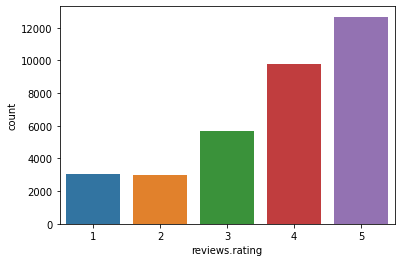

In [19]:
sns.countplot(x ='reviews.rating', data = reviews_df)

plt.show()


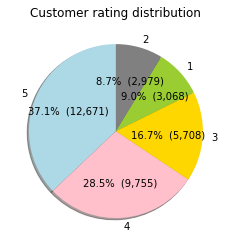

In [20]:
values=reviews_df["reviews.rating"].value_counts().values  
labels=reviews_df["reviews.rating"].value_counts().index   
colors=['lightblue','pink','gold','yellowgreen','grey']   

plt.pie(values,labels=labels,autopct=lambda p : '{:.1f}%  ({:,.0f})'.format(p,p * sum(values)/100),colors=colors, shadow=True,startangle=90)
plt.title('Customer rating distribution',color='black')

plt.show()

### 4.1 Bad review distribution

Oberservation: 
This dataset is highly imbalanced because only 17.8% of reviews are considered negative ones.

In [21]:
reviews_df["is_bad_review"].value_counts(normalize = True)


Not Bad Review    0.823089
Bad Review        0.176911
Name: is_bad_review, dtype: float64

### 4.2 The comment word frequency: Wordcloud function

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

Oberservation:
Most of the words are indeed related to the hotels: stay, night, staff, etc. 
Some words are more related to the customer experience: best, top, amaze,pleasant etc.


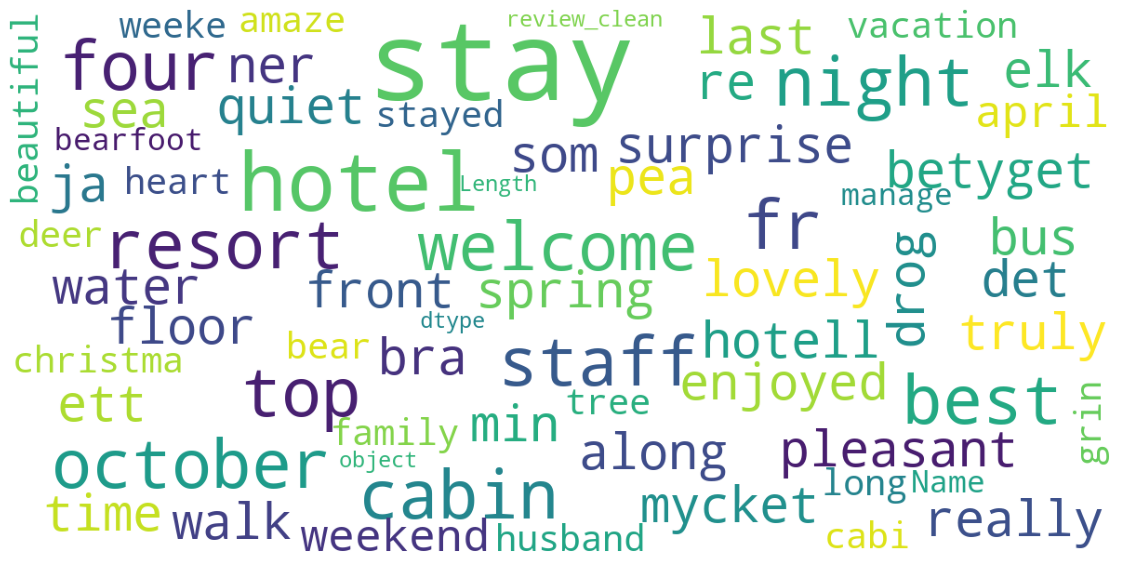

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 300,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["review_clean"])



### 4.3 Highest positive sentiment reviews (with more than 5 words)


In [23]:

positive10=reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["reviews.text", "pos"]].head(10)



### 4.4 Lowest negative sentiment reviews (with more than 5 words)

Obervation:
The accuracy of the Vader performs good. The ranking of the positive sentiment indeed mathes the review content.
Vader sometimes interpret 'no' or 'nothing' as negative words whereas they are 
sometimes used to say that there were no problems with the hotel. 



In [24]:
negative10=reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["reviews.text", "neg"]].head(10)



### 4.5 Explore the length of comments where customers gave the lowest rating. 

In [25]:
reviews_df[reviews_df['reviews.rating']==1].sort_values("reviews.text", ascending = True)[["reviews.text", "reviews.rating",'nb_words']].head(20)



,reviews.text,reviews.rating,nb_words
25919,! ! ! ! 210 . ! .,1,8
26431,...only as a last resort should you ever stay ...,1,61
17571,02/17/2016 The staff of this hotel is totally ...,1,61
8614,1) They gave me a room in the 2nd floor even t...,1,255
33600,1. I wasn't given a non smoking room and I was...,1,70
10471,1. Reserved On line showing 2 queen beds - rec...,1,92
511,1. The door to the room was broken and did not...,1,78
13507,1. had to wait on check in because i was 15 mi...,1,126
763,1.) We live out of town and we stayed at this ...,1,61
29844,100 deposit? Wth? It's a b-,1,6


### 4.6 Explore the length of comments where customers gave the highest rating. 

In [26]:
reviews_df[reviews_df['reviews.rating']==5].sort_values("reviews.text", ascending = True)[["reviews.text", "reviews.rating",'nb_words']].head(20)


,reviews.text,reviews.rating,nb_words
14557,!,5,1
14181,!,5,1
14182,!,5,1
10080,"! , ! .",5,4
4737,!!!!!!!!!!!!!!!!,5,1
33377,"""Another reason to stay at this Hampton: AT&T ...",5,30
33373,"""another reason to stay at this hampton: at&t ...",5,30
29494,"#408 really big room, very cool and clean. per...",5,9
33673,#biztrip or miss a connecting flight at IAD #m...,5,16
32553,$100 ransom for oversized vehicles. small tv. ...,5,12


### 4.7 Hypothesis testing: Independent Sample T-tests

H0: There is no difference in the average length of comments between customers who rates the hotel low and those who rate not low.

H1: There is a significant difference in the average length of comments between customers who rates the hotel low and those who rate not low.

The variances of the two populations are not equal.


In [28]:
from scipy.stats import ttest_ind

Bad=reviews_df[reviews_df['is_bad_review']=='Bad Review']['nb_words']
NotBad=reviews_df[reviews_df['is_bad_review']=='Not Bad Review']['nb_words']

stat,p=ttest_ind(Bad,NotBad,equal_var=False)

print('stat is: ' + str(stat))
print('P-value is: ' + str(p))

print('I cannot reject the Null Hypothesis') if p >0.05 else print('I can reject the Null Hypothesis. So there is a significant difference in the average length of comments between customers who rates the hotel low and those who rate not low')



stat is: 24.15912180198877
P-value is: 3.562280119116915e-124
I can reject the Null Hypothesis. So there is a significant difference in the average length of comments between customers who rates the hotel low and those who rate not low


# Question: 
### When a customer feels negative or positive about the hotel, she will write a longer feedback. 



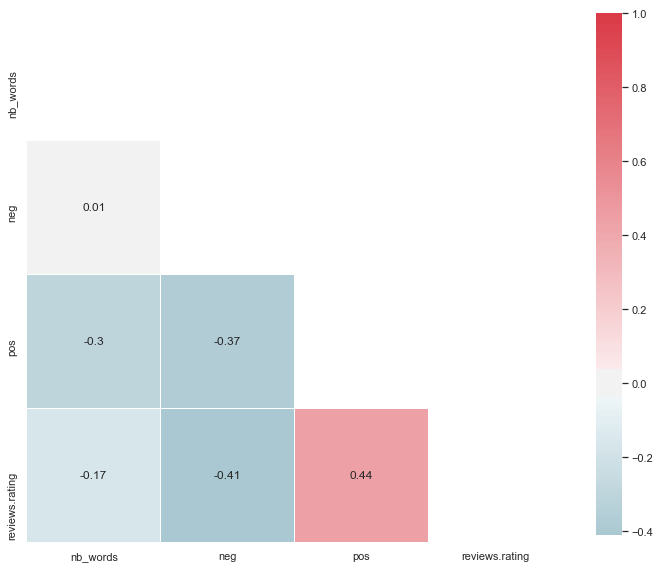

In [29]:

from string import ascii_letters

sns.set(style="white")


# Compute the correlation matrix
features=list(['nb_words','neg','pos','reviews.rating'])

corr = reviews_df[features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.1, cbar_kws={"shrink": .6})


### 5. Export data

In [30]:
reviews_df.iloc[:, 10:30]

,reviews.dateAdded,reviews.rating,reviews.text,reviews.title,reviews.username,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word_aaa,word_abandon
0,2016-10-24T00:00:25Z,4,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,Russ (kent),Not Bad Review,pleasant min walk along sea front water bus re...,0.052,0.695,0.252,0.8299,194,33,-0.158053,-0.134707,-0.193909,0.064899,0.262917,0.0,0.0
1,2016-10-24T00:00:25Z,5,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,A Traveler,Not Bad Review,really lovely hotel stay top floor surprise ja...,0.019,0.500,0.481,0.9828,252,44,-0.182890,-0.068810,0.093118,0.029378,-0.207300,0.0,0.0
2,2016-10-24T00:00:25Z,5,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,Maud,Not Bad Review,ett mycket bra hotell det som drog ner betyget...,0.000,1.000,0.000,0.0000,136,28,0.250342,0.543976,-0.001820,0.325123,0.594589,0.0,0.0
3,2016-10-24T00:00:25Z,5,We stayed here for four nights in October. The...,Good location on the Lido.,Julie,Not Bad Review,stay four night october hotel staff welcome fr...,0.000,0.711,0.289,0.9643,354,59,0.020993,-0.028016,0.071784,0.018522,0.044549,0.0,0.0
4,2016-10-24T00:00:25Z,5,We stayed here for four nights in October. The...,������ ���������������,sungchul,Not Bad Review,stay four night october hotel staff welcome fr...,0.000,0.711,0.289,0.9643,354,59,-0.056991,-0.013012,-0.094130,-0.050916,0.074792,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35905,2016-06-23T16:50:58Z,5,We truly enjoyed staying at the Elk Springs re...,We Loved It!,randolphtiffany,Not Bad Review,truly enjoyed stay elk spring resort quiet pea...,0.000,0.621,0.379,0.9813,340,58,0.018947,-0.047858,0.254292,0.100260,0.026779,0.0,0.0
35906,2016-06-23T16:50:58Z,5,We were here for a 2nd time the last weekend o...,Amazing time (both times!!),Sabrina P,Not Bad Review,time last weekend april stayed deer heart cabi...,0.000,0.881,0.119,0.8271,306,61,0.033479,0.139732,0.270195,0.088062,0.171720,0.0,0.0
35907,2016-06-23T16:50:58Z,5,Best of the Best!!!! My family and I stayed in...,Amazing time (both times!!),Chelsa K.,Not Bad Review,best best family stay grin bear cabin christma...,0.011,0.695,0.293,0.9854,472,88,0.067152,0.156796,0.375478,-0.037742,0.071450,0.0,0.0
35908,2016-06-23T16:50:58Z,5,Amazing Vacation in Beautiful Cabin We stayed ...,Amazing time (both times!!),Heather D.,Not Bad Review,amaze vacation beautiful cabin stay long weeke...,0.000,0.712,0.288,0.9759,349,70,0.095043,0.102914,0.335409,0.153784,-0.012882,0.0,0.0


In [33]:
reviews_df=reviews_df.rename(columns={'name':'hotel_name', 'reviews.date':'review_date','reviews.dateAdded':'review_dateAdded',
                           'reviews.rating':'review_rating','reviews.text':'review_content',
                          'reviews.title':'review_title','neg':'negative_sentiment','neu':'neutral_sentiment',
                          'pos':'positive_sentiment','compound':'compound_sentiment'})



In [34]:
reviews_df.shape

(34181, 4538)